In [1]:
# Import required packages

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from multiple_reg import multiple_regression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Following methods are avilable
1. get_numpy_data(data, features, output)
2. predict_output(feature_matrix, weights)
3. feature_derivative(errors, feature)
4. regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance)
5. get_rmse(predictions, output)


In [2]:
# Importat data using Panda's read.csv command. Note: this is panda type data frane. 

input_file = "kc_house_data.csv"
data = pd.read_csv(input_file, header = 0)
train = pd.read_csv("kc_house_train_data.csv",header = 0)
test = pd.read_csv("kc_house_test_data.csv", header = 0)

In [3]:
train.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


# 1. Simple linear regression

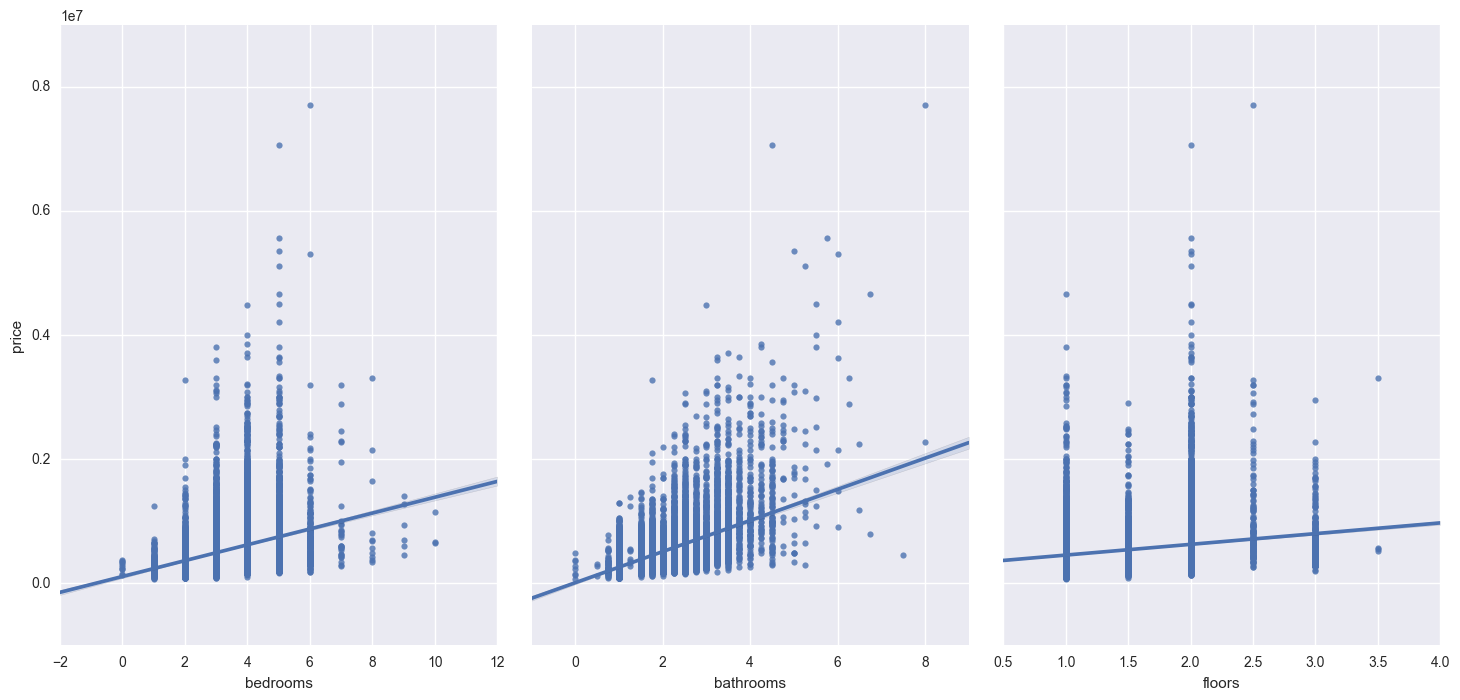

In [4]:
# Plot Price Vs bedrooms, bathrooms, floors
sns.pairplot(train, x_vars=['bedrooms','bathrooms','floors'], y_vars='price', size=7, aspect=0.7, kind='reg')

## Scikit Learn - linear regression

('Intercept', array([ 109473.17762296]))
('Slope', array([ 127588.95293399]))


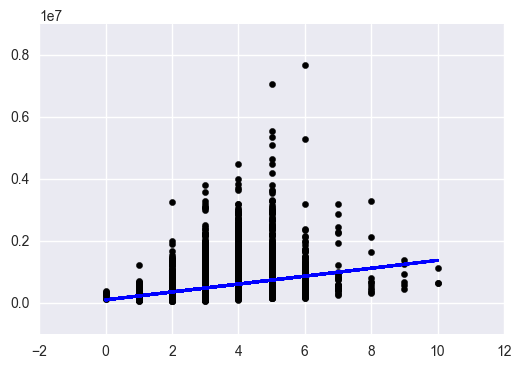

('Root Mean Squre Error', 555818.26824671845)
('Absolute Error', 540327.64814797265)


In [5]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# To use a linear model from Scikitlearn, data should in numpy array form

x = train[["bedrooms"]]
y = train[["price"]]

# Fit Linear model

model_sk = lm.fit(x, y)

# print the intercept and coefficients

print('Intercept', model_sk.intercept_)
print("Slope", (model_sk.coef_)[0])

# Plot Model & Predictions

plt.scatter(x, y,  color='black')
plt.plot(x, model_sk.predict(x), color='blue', linewidth=2)
plt.show()

# Predictions

y_pred = model_sk.predict(test[['bedrooms']])

# Errors

from sklearn import metrics
print("Root Mean Squre Error",np.sqrt(metrics.mean_squared_error(test[['bedrooms']], y_pred))) # RMSE
print("Absolute Error", metrics.mean_absolute_error(test[['bedrooms']], y_pred)) # Absolute Error

# 2. Multiple regression

Regression Coefficients: 
[   0.          245.18871442   65.27158522]


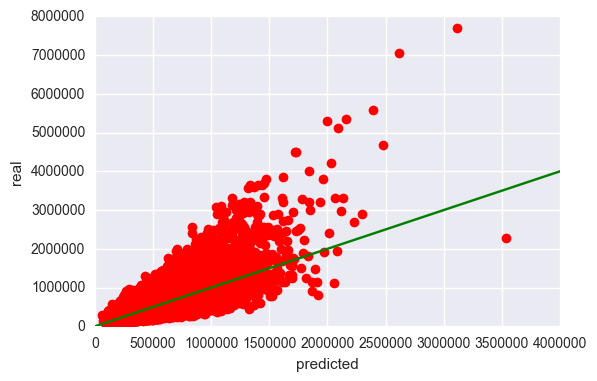

In [6]:
# Model - 1
model1_features = ['sqft_living', 'sqft_living15']
output = 'price'

# Convert features into numpy array 
from multiple_reg import multiple_regression
(model1_features_array, model1_output_array) = multiple_regression().get_numpy_data(train, model1_features, output)

model1 = lm.fit(model1_features_array, model1_output_array)

# Check the coeff
print 'Regression Coefficients: \n', model1.coef_

model1_pred = model1.predict(model1_features_array)

# Plot outputs
%matplotlib inline
plt.plot(model1_pred, model1_output_array,'ro')
plt.plot([0,4000000],[0,4000000], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

In [7]:
def k_fold_cross_validation_rmse(train, model, input_array, output_array, nfold):
    
    from sklearn.cross_validation import KFold
    kf = KFold(len(train), n_folds= nfold)
    crossval_err = 0
    for train , test in kf:
        model.fit(input_array[train],output_array[train])
        p = model.predict(input_array[test])
        e = p - output_array[test]
        crossval_err += np.dot(e,e)
        crossval_err = np.sqrt(crossval_err/len(train))
    return crossval_err

validation_error = k_fold_cross_validation_rmse(train, lm, model1_features_array, model1_output_array, 10 )
print(validation_error)

92314.6223977


Regression Coefficients: 
[  0.00000000e+00  -7.34047041e+04   7.21012683e+04   2.76089252e-02
   5.28942471e+04  -7.21356670e-01   2.57669115e+02   8.94555004e+01
  -3.61261438e+03]


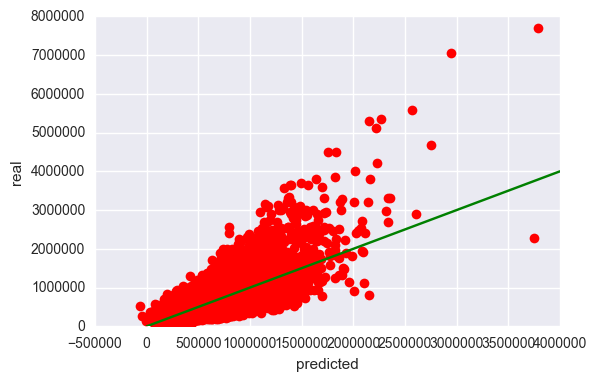

In [8]:
model2_features = ['bedrooms','bathrooms', 'sqft_lot','floors', 'sqft_lot15','sqft_living', 'sqft_living15','yr_built']
output = 'price'


(model2_features_array, model2_output_array) = multiple_regression().get_numpy_data(train, model2_features, output)

model2 = lm.fit(model2_features_array, model2_output_array)

print 'Regression Coefficients: \n', model2.coef_

model2_pred = model2.predict(model2_features_array)

# Plot outputs
%matplotlib inline
plt.plot(model2_pred, model2_output_array,'ro')
plt.plot([0,4000000],[0,4000000], 'g-')
plt.xlabel('predicted')
plt.ylabel('real')
plt.show()

In [10]:
print('Model 2 : Better than Model 1')

validation_error_model2 = k_fold_cross_validation_rmse(train, lm, model2_features_array, model2_output_array,10 )
print('Validation Error: %.4f' %validation_error_model2)

rmse = multiple_regression().get_rmse(model2_pred, model2_output_array )
print('RMSE on training: %.4f' %rmse)

(model2_features_array_test, model2_output_array_test) = multiple_regression().get_numpy_data(test, model2_features, output)
model2_pred_test = model2.predict(model2_features_array_test)

rmse_test = multiple_regression().get_rmse(model2_pred_test, model2_output_array_test )
print('RMSE on test: %.4f' %rmse_test)

print "\n"
print('Model 1')

validation_error_model1 = k_fold_cross_validation_rmse(train, lm, model1_features_array, model1_output_array,10 )
print('Validation Error: %.4f' %validation_error_model1)

rmse_model1 = multiple_regression().get_rmse(model1_pred, model1_output_array )
print('RMSE on training: %.4f' %rmse_model1)

(model1_features_array_test, model1_output_array_test) = multiple_regression().get_numpy_data(test, model1_features, output)
model1_pred_test = model1.predict(model1_features_array_test)

rmse_test = multiple_regression().get_rmse(model1_pred_test, model1_output_array_test )
print('RMSE on test: %.4f' %rmse_test)

Model 2 : Better than Model 1
Validation Error: 91072.7306
RMSE on training: 242039.3301
RMSE on test: 237334.4762


Model 1
Validation Error: 92314.6224
RMSE on training: 261304.2406
RMSE on test: 252854.1766


Thus, model 2 is better than model 1 in prediction housing price.

# 3. Ridge regression

The regularized features derivative is:

```
2*SUM[ error*[feature_i] ] + 2*l2_penalty*w[i]. 
```


In [11]:
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=10)

# Train the model using the training set
model3 = ridge.fit(model2_features_array, model2_output_array)

model3_pred = model3.predict(model2_features_array)

print 'Regression Coefficients: \n', model3.coef_

Regression Coefficients: 
[  0.00000000e+00  -7.33033281e+04   7.18928757e+04   2.76193759e-02
   5.28010368e+04  -7.21573162e-01   2.57740686e+02   8.94494168e+01
  -3.61013788e+03]


In [12]:
validation_error_model3 = k_fold_cross_validation_rmse(train, ridge, model2_features_array, model2_output_array, 10 )
print('Validation Error: %.4f' %validation_error_model2)

rmse = multiple_regression().get_rmse(model3_pred, model2_output_array )
print('RMSE on training: %.4f' %rmse)

Validation Error: 91072.7306
RMSE on training: 242039.3626


In [13]:
# Pick the best value of alpha 

alpha = np.logspace(-3, 2, num=10)
cv_err = np.array([])
rmse = np.array([])

for a in alpha:
    ridge = Ridge(fit_intercept=True, alpha=a)
    model = ridge.fit(model2_features_array, model2_output_array)
    model_pred = model.predict(model2_features_array)
    cverr = k_fold_cross_validation_rmse(train, ridge, model2_features_array, model2_output_array, 10 )
    rmse_err = multiple_regression().get_rmse(model_pred, model2_output_array )
    cv_err = np.append(cv_err, [cverr])
    rmse = np.append(rmse, [rmse_err])
  
    print('alpha:', a, 'cv_err:', cverr, 'RMSE_training:',rmse_err)

('alpha:', 0.001, 'cv_err:', 91072.731787692726, 'RMSE_training:', 242039.33014301065)
('alpha:', 0.0035938136638046258, 'cv_err:', 91072.734963743642, 'RMSE_training:', 242039.33014301455)
('alpha:', 0.01291549665014884, 'cv_err:', 91072.746377862393, 'RMSE_training:', 242039.33014306478)
('alpha:', 0.046415888336127795, 'cv_err:', 91072.787397866428, 'RMSE_training:', 242039.33014371357)
('alpha:', 0.1668100537200059, 'cv_err:', 91072.934813379208, 'RMSE_training:', 242039.33015209236)
('alpha:', 0.59948425031894093, 'cv_err:', 91073.464561898116, 'RMSE_training:', 242039.33026028599)
('alpha:', 2.1544346900318843, 'cv_err:', 91075.367922535312, 'RMSE_training:', 242039.33165660893)
('alpha:', 7.7426368268112773, 'cv_err:', 91082.202342741482, 'RMSE_training:', 242039.34964214286)
('alpha:', 27.825594022071257, 'cv_err:', 91106.687596021278, 'RMSE_training:', 242039.57969677978)
('alpha:', 100.0, 'cv_err:', 91193.691428105798, 'RMSE_training:', 242042.45059860876)


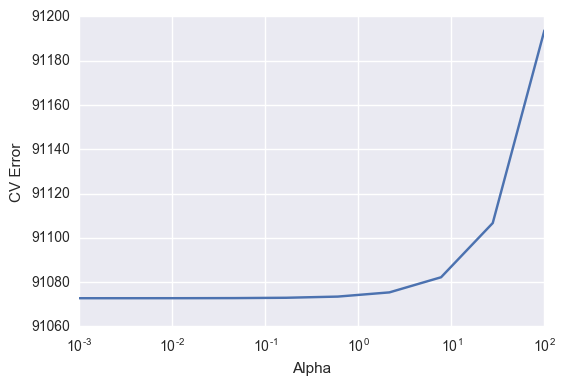

In [14]:
plt.plot(alpha, cv_err, label='CV Error')
plt.ylabel('CV Error')
plt.xlabel('Alpha')
plt.xscale("log", nonposx='clip')
plt.show()

Model 3: ridge regression is usually needed to account overfitting and reduce variance. Model 2 has already low variance making it no need of ridge regression.

# 4. Lasso regression

In [31]:
a = 100

lasso = Lasso(fit_intercept=True, alpha=a)
model4 = lasso.fit(model2_features_array, model2_output_array)

model4_pred = model4.predict(model2_features_array)

model4_coeff = model4.coef_
print(model4_coeff)
print('\n')
print('# of Non-zero features %.2f' %np.count_nonzero(model4_coeff))

[  0.00000000e+00  -7.31700034e+04   7.16296436e+04   2.76105837e-02
   5.25280248e+04  -7.22047174e-01   2.57851218e+02   8.94351891e+01
  -3.60565218e+03]


# of Non-zero features 8.00


In [37]:
# Check the no of Non-zero feature and Errors

al = np.logspace(-3, 10, num=10)
err = np.array([])
rmse = np.array([])
nonzero = np.array([])

for a in al:
    lasso = Lasso(fit_intercept=True, alpha=a)
    model = lasso.fit(model2_features_array, model2_output_array)
    model_coeff = model.coef_
    nz = np.count_nonzero(model_coeff)
    model_pred = model.predict(model2_features_array)
    cverr = k_fold_cross_validation_rmse(train, lasso, model2_features_array, model2_output_array, 10 )
    rmse_err = multiple_regression().get_rmse(model_pred, model2_output_array )
    err = np.append(err, [cverr])
    rmse = np.append(rmse, [rmse_err])
    nonzero = np.append(nonzero, [nz])
  
    print('alpha:', a, 'cv_err:', cverr, 'Non-Zero Features:',nz)

('alpha:', 0.001, 'cv_err:', 91072.730949746969, 'Non-Zero Features:', 8)
('alpha:', 0.027825594022071243, 'cv_err:', 91072.741318615008, 'Non-Zero Features:', 8)
('alpha:', 0.774263682681127, 'cv_err:', 91073.029845984318, 'Non-Zero Features:', 8)
('alpha:', 21.544346900318821, 'cv_err:', 91081.062422819465, 'Non-Zero Features:', 8)
('alpha:', 599.48425031894089, 'cv_err:', 91307.818806290714, 'Non-Zero Features:', 8)
('alpha:', 16681.005372000593, 'cv_err:', 97113.575559426215, 'Non-Zero Features:', 6)
('alpha:', 464158.88336127723, 'cv_err:', 96013.136407138212, 'Non-Zero Features:', 5)
('alpha:', 12915496.650148828, 'cv_err:', 90694.900094540702, 'Non-Zero Features:', 4)
('alpha:', 359381366.38046259, 'cv_err:', 125227.31354141964, 'Non-Zero Features:', 1)
('alpha:', 10000000000.0, 'cv_err:', 125711.91765564475, 'Non-Zero Features:', 0)


# 5. K-nearest neighbors search

In [3]:
# Let's include all features

from knn import k_nearest_neighbours

feature_list = ['bedrooms',  
                'bathrooms',  
                'sqft_living',  
                'sqft_lot',  
                'floors',
                'waterfront',  
                'view',  
                'condition',  
                'grade',  
                'sqft_above',  
                'sqft_basement',
                'yr_built',  
                'yr_renovated',  
                'lat',  
                'long',  
                'sqft_living15',  
                'sqft_lot15']

knn_features_train, knn_output_train = k_nearest_neighbours().get_numpy_data(train, feature_list, 'price')
knn_features_test, knn_output_test = k_nearest_neighbours().get_numpy_data(test, feature_list, 'price')

Following methods are avilable
1. get_numpy_data(data, features, output)
2. compute_distances(feature_matrix, feature_vector)
3. get_k_nearest(k, feature_matrix, feature_vector)
4. predict_for_one(k, feature_matrix, output_values, feature_vector)
5. predict_for_set(k, feature_matrix, output_values, feature_set)
6. get_residual_sum_of_squares(predictions, output)
7. get_rmse(predictions, output)


In [4]:
# Predict best housing price for 3rd house in test data set by averaging house prices of 2 nearest houses

predicted_value = k_nearest_neighbours().predict_for_one(5, knn_features_train, knn_output_train, knn_features_test[2])
print ('K = 5')
print('Predicted Value $%s' % predicted_value)
print('Actual Value $%s' %knn_output_test[2])
print('\n')

predicted_value = k_nearest_neighbours().predict_for_one(3, knn_features_train, knn_output_train, knn_features_test[2])
print ('K = 3')
print('Predicted Value $%s' % predicted_value)
print('Actual Value $%s' %knn_output_test[2])
print('\n')

predicted_value = k_nearest_neighbours().predict_for_one(1, knn_features_train, knn_output_train, knn_features_test[2])
print ('K = 1')
print('Predicted Value $%s' % predicted_value)
print('Actual Value $%s' %knn_output_test[2])
print('\n')

K = 5
Predicted Value $563600.0
Actual Value $233000.0


K = 3
Predicted Value $451000.0
Actual Value $233000.0


K = 1
Predicted Value $290000.0
Actual Value $233000.0




In [5]:
# Make predictions for the first 10 houses in the test set using k-nearest neighbors with k=10.

predicted_values = k_nearest_neighbours().predict_for_set(10, knn_features_train, 
                                                          knn_output_train, knn_features_test[0:10])

min_index = np.argmin(predicted_values)
print('house #%d has minimum value' % (min_index + 1))
print('Predicted Value $%s' % predicted_values[min_index])

house #1 has minimum value
Predicted Value $315795.0


In [6]:
# Pick the best value of k using validation set

from sklearn.cross_validation import train_test_split
train, validation = train_test_split(train, test_size = 0.3)

knn_features_validation, knn_output_validation = k_nearest_neighbours().get_numpy_data(validation, 
                                                                                       feature_list, 'price')

rss_all = []
for k in range(1,16):    
    predicted_values = k_nearest_neighbours().predict_for_set(k, knn_features_train, knn_output_train, 
                                                              knn_features_validation)
    RSS = k_nearest_neighbours().get_residual_sum_of_squares(predicted_values, knn_output_validation)
    rss_all.append(RSS)